In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
m = 1000
n = 2
c = 2
X = np.random.rand(m, n)
y = np.where(2*X[:,0]+X[:,1]<1.5, 1, 0)

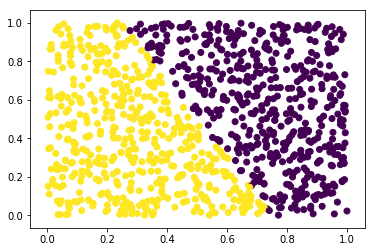

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [59]:
X_train = np.insert(X, 0, values=1., axis=1)
y_train = y[:, np.newaxis]
W = np.random.randn(n+1, c)

In [5]:
rate = 1.0

In [24]:
Ls = []
def train_svm():
    global X_train, W, y
    H = X_train @ W
    H_y = H[np.arange(m), y][:, np.newaxis].repeat(2, axis=1)
    H_svm = np.maximum(0, H + 1 - H_y)
    H_svm[np.arange(m), y] = 0
    L = np.sum(H_svm)/m

    dH = (H_svm>0).astype(float)/m
    dW = X_train.T @ dH
    W -= rate*dW
    
    return W, L

In [11]:
from matplotlib import animation
%matplotlib qt5

In [60]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(X[:,0],X[:,1],c=y)

W_l = W[:,0]-W[:,1]
pX0 = -W_l[0]/W_l[1]
pX1 = -(W_l[0] + W_l[2])/W_l[1]

line, = plt.plot([pX0, pX1], [0, 1])

def update(data, *args):
    l = args[0]
    l[0] += 1
    ax.set_title(f'epoch:{l[0]} loss:{data[1]}')
    line.set_xdata(data[0])

def gen_data():
    while True:
        W, L = train_svm()

        W_l = W[:,0]-W[:,1]
        pX0 = -W_l[0]/W_l[1]
        pX1 = -(W_l[0] + W_l[2])/W_l[1]
        yield [pX0, pX1], L

ani = animation.FuncAnimation(fig, update, gen_data, fargs=([0],), interval=1)

plt.show()

In [61]:
plt.close()

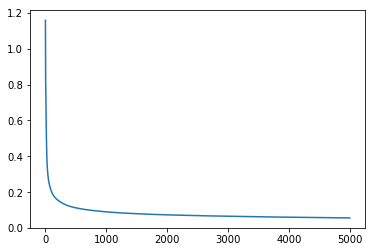

In [320]:
plt.plot(Ls)

In [321]:
acc = np.argmax(X_train@W, axis=1)==y
np.sum(acc)/1000

0.999

In [322]:
# 权重理论比值为 -1.5：2：1
W_val = W[:,0]-W[:,1]
W_val / W_val[2]

array([-1.53091445,  2.06297016,  1.        ])

In [323]:
xp, yp = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
xyp = np.vstack([xp.flatten(), yp.flatten()]).T
xyp = np.insert(xyp, 0, 1., axis=1)
zp = np.argmax(xyp @ W, axis=1).reshape(50, 50)

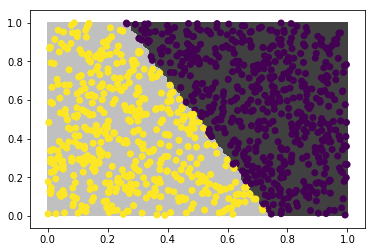

In [324]:
plt.contourf(xp, yp, zp, [0, 0.5, 1], cmap=plt.cm.binary_r)
plt.scatter(X[:,0],X[:,1],c=y)